In [1]:
# Fill in the wandb_id assigned to your demo run!
YOUR_ID = "g5zubouf"
wandb_id = YOUR_ID
if wandb_id == 'YOUR_ID':
    raise ValueError('Need to provide wandb_id of demo run!')

In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import pickle
# import wandb
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Helper Functions

# def restore_file(wandb_id, filename='wandb-summary.json'):
#     files_dir = 'notebooks/restored_files'    
#     os.system(f'mkdir -p {files_dir}')

#     api = wandb.Api()
#     run = api.run(f'semantic_uncertainty/{wandb_id}')

#     path = f'{files_dir}/{filename}'
#     os.system(f'rm -rf {path}')
#     run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
#     with open(path, 'r') as f:
#         out = json.load(f)
#     return out
curr_run = "run-20251121_002455-khzh2gjj"

def restore_file(filename):
    curr_dir = f"../cpsc4710_slz4/uncertainty/wandb/{curr_run}/files"
    with open(f"{curr_dir}/{filename}", 'r') as f:
        out = json.load(f)
    return out

def get_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy', 'p_false', 'p_ik']
    df = df.set_index('method').loc[main_methods].reset_index()
    main_names = ['Semantic entropy', 'Discrete Semantic Entropy', 'Naive Entropy', 'p(True)', 'Embedding Regression']
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

In [4]:
results = restore_file("results_dict.json")
results

{'performance': {'accuracy': {'mean': 0.6205882352941177,
   'bootstrap': {'std_err': 0.026166691800333004,
    'low': 0.5766027848085481,
    'high': 0.6617647058823529}}},
 'uncertainty': {'p_false': {'AUROC': {'mean': 0.7574121018406261,
    'bootstrap': {'std_err': 0.026867169186048145,
     'low': 0.7070493108509033,
     'high': 0.7974334233999933}},
   'area_under_thresholded_accuracy': {'mean': 0.7372885070280651,
    'bootstrap': {'std_err': 0.024316468955937198,
     'low': 0.694190388087934,
     'high': 0.7748412170362136}},
   'mean_uncertainty': {'mean': 1.7989104248377878,
    'bootstrap': {'std_err': 0.05760976058894955,
     'low': 1.7120148884002906,
     'high': 1.899386874258439}},
   'accuracy_at_0.8_answer_fraction': {'mean': 0.6985294117647058,
    'bootstrap': {'std_err': 0.0326297948905723,
     'low': 0.6483516483516484,
     'high': 0.7545787545787546}},
   'accuracy_at_0.9_answer_fraction': {'mean': 0.6503267973856209,
    'bootstrap': {'std_err': 0.02892157

In [5]:
unc_df = get_uncertainty_df(results)

In [6]:
results

{'performance': {'accuracy': {'mean': 0.6205882352941177,
   'bootstrap': {'std_err': 0.026166691800333004,
    'low': 0.5766027848085481,
    'high': 0.6617647058823529}}},
 'uncertainty': {'p_false': {'AUROC': {'mean': 0.7574121018406261,
    'bootstrap': {'std_err': 0.026867169186048145,
     'low': 0.7070493108509033,
     'high': 0.7974334233999933}},
   'area_under_thresholded_accuracy': {'mean': 0.7372885070280651,
    'bootstrap': {'std_err': 0.024316468955937198,
     'low': 0.694190388087934,
     'high': 0.7748412170362136}},
   'mean_uncertainty': {'mean': 1.7989104248377878,
    'bootstrap': {'std_err': 0.05760976058894955,
     'low': 1.7120148884002906,
     'high': 1.899386874258439}},
   'accuracy_at_0.8_answer_fraction': {'mean': 0.6985294117647058,
    'bootstrap': {'std_err': 0.0326297948905723,
     'low': 0.6483516483516484,
     'high': 0.7545787545787546}},
   'accuracy_at_0.9_answer_fraction': {'mean': 0.6503267973856209,
    'bootstrap': {'std_err': 0.02892157

(0.6, 0.9)

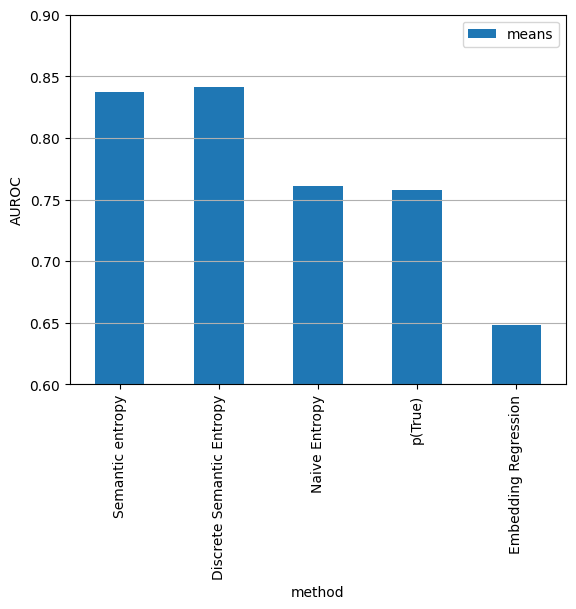

In [9]:
metric = 'AUROC'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.6, 0.9)